# Sistema de Recomendação de Filmes Brasileiros: Letterboxd

## Análise Exploratória dos Dados

### 1. Descrição:
Este trabalho consiste na utilização de métodos estatísticos com a finalidade de explorar e extrair conhecimento do dataset gerado no trabalho anterior.

### 2. Técnicas a serem utilizadas:
1. Métodos de Análise Estatística dos Dados: </br>
a) Medidas de Tendência Central</br>
b) Medidas de Variabilidade</br>
c) Tabela de Frequência e Histograma</br>
d) Boxplot</br>
e) QQ-Plot</br>
f) Correlações</br>
g) Teste de Normalidade</br>
h) Best Fit Distribution</br>

In [1]:
# Importar bibliotecas:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# Ler a base de dados:
base_dados = pd.read_csv('total_55_paginas.csv')

In [3]:
# Visualizar os primeiros dados do dataset:
base_dados.head()

,Ano,País,País 1,Pais 2,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,...,Gênero,Gênero 1,Gênero 2,Gênero 3,Temas,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5
0,2002,['Brazil'],Brazil,--,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,...,"['crime', 'drama']",crime,drama,--,"['Crime, drugs and gangsters', 'drugs, violenc...","Crime, drugs and gangsters","drugs, violence, crime, gritty or cops","violence, action, guns, cops or killing","gangster, crime, criminal, violence or ruthless","violence, shock, disturbing, brutal or graphic"
1,2012,"['Brazil', 'USA']",Brazil,USA,Frances Ha,Frances Ha,Noah Baumbach,305k,79k,111k,...,"['comedy', 'drama']",comedy,drama,--,"['Relationship comedy', 'Song and dance', 'Und...",Relationship comedy,Song and dance,Underdogs and coming of age,"dancing, choreography, songs, tune or musical","romance, emotion, relationships, feelings or c..."
2,2019,"['Brazil', 'China', 'USA']",Brazil,China,Ad Astra,Ad Astra,James Gray,299k,62k,65k,...,"['drama', 'science-fiction']",drama,science-fiction,--,"['Monsters, aliens, sci-fi and the apocalypse'...","Monsters, aliens, sci-fi and the apocalypse","earth, sci-fi, space, spaceship or scientific","sci-fi, aliens, space, spaceship or earth","destruction, disaster, earth, scientific or ma...","future, sci-fi, technology, action or technolo..."
3,2009,"['Brazil', 'Canada', 'France', 'Germany', 'Ita...",Brazil,Canada,Enter the Void,Enter the Void,Gaspar Noé,150k,39k,44k,...,"['fantasy', 'drama']",fantasy,drama,--,"['Humanity and the world around us', 'Intense ...",Humanity and the world around us,Intense violence and sexual transgression,Faith and religion,"death, profound, symbolism, philosophical or v...","sex, sexuality, relationships, erotic or feelings"
4,2019,"['Brazil', 'France']",Brazil,France,Bacurau,Bacurau,Kleber Mendonça Filho,111k,31k,41k,...,"['thriller', 'western', 'mystery']",thriller,western,mystery,"['Politics and human rights', 'Westerns', 'pol...",Politics and human rights,Westerns,"political, democracy, president, documentary o...","cannibals, gory, gruesome, graphic or shock","future, sci-fi, technology, action or technolo..."


In [4]:
# Shape: linhas e colunas
base_dados.shape

(3884, 25)

### Limpeza de dados: apagar colunas e linhas descartáveis

In [5]:
base_dados = base_dados.drop_duplicates()
base_dados

,Ano,País,País 1,Pais 2,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,...,Gênero,Gênero 1,Gênero 2,Gênero 3,Temas,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5
0,2002,['Brazil'],Brazil,--,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,...,"['crime', 'drama']",crime,drama,--,"['Crime, drugs and gangsters', 'drugs, violenc...","Crime, drugs and gangsters","drugs, violence, crime, gritty or cops","violence, action, guns, cops or killing","gangster, crime, criminal, violence or ruthless","violence, shock, disturbing, brutal or graphic"
1,2012,"['Brazil', 'USA']",Brazil,USA,Frances Ha,Frances Ha,Noah Baumbach,305k,79k,111k,...,"['comedy', 'drama']",comedy,drama,--,"['Relationship comedy', 'Song and dance', 'Und...",Relationship comedy,Song and dance,Underdogs and coming of age,"dancing, choreography, songs, tune or musical","romance, emotion, relationships, feelings or c..."
2,2019,"['Brazil', 'China', 'USA']",Brazil,China,Ad Astra,Ad Astra,James Gray,299k,62k,65k,...,"['drama', 'science-fiction']",drama,science-fiction,--,"['Monsters, aliens, sci-fi and the apocalypse'...","Monsters, aliens, sci-fi and the apocalypse","earth, sci-fi, space, spaceship or scientific","sci-fi, aliens, space, spaceship or earth","destruction, disaster, earth, scientific or ma...","future, sci-fi, technology, action or technolo..."
3,2009,"['Brazil', 'Canada', 'France', 'Germany', 'Ita...",Brazil,Canada,Enter the Void,Enter the Void,Gaspar Noé,150k,39k,44k,...,"['fantasy', 'drama']",fantasy,drama,--,"['Humanity and the world around us', 'Intense ...",Humanity and the world around us,Intense violence and sexual transgression,Faith and religion,"death, profound, symbolism, philosophical or v...","sex, sexuality, relationships, erotic or feelings"
4,2019,"['Brazil', 'France']",Brazil,France,Bacurau,Bacurau,Kleber Mendonça Filho,111k,31k,41k,...,"['thriller', 'western', 'mystery']",thriller,western,mystery,"['Politics and human rights', 'Westerns', 'pol...",Politics and human rights,Westerns,"political, democracy, president, documentary o...","cannibals, gory, gruesome, graphic or shock","future, sci-fi, technology, action or technolo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,2019,['Brazil'],Brazil,--,The Fourth Wall,‘A Quarta Parede’,Hudson Senna,34,43,3,...,['drama'],drama,--,--,--,-,-,--,--,--
3880,2010,['Brazil'],Brazil,--,Boa Noite Cinderela,Boa Noite Cinderela,Neville d’Almeida,55,15,1,...,['crime'],crime,--,--,--,-,-,--,--,--
3881,1977,['Brazil'],Brazil,--,Os Amores da Pantera,Os Amores da Pantera,Jece Valadão,24,26,1,...,['crime'],crime,--,--,--,-,-,--,--,--
3882,1970,['Brazil'],Brazil,--,Minha Namorada,Minha Namorada,Zelito Viana,29,31,2,...,"['adventure', 'romance']",adventure,romance,--,--,-,-,--,--,--


In [6]:
base_dados.shape

(3812, 25)

In [7]:
# Apagar países além de Brasil: tudo aquilo que for diferente do vazio ('--')
indexNames = base_dados[base_dados['Pais 2']!='--'].index
base_dados.drop(indexNames,inplace=True)

In [8]:
# Conferir que só há apenas 1 valor para a coluna de país 1, que é igual a Brasil
base_dados['País 1'].value_counts()

Brazil    3326
Name: País 1, dtype: int64

In [9]:
# A imensa maioria do dataset não possui Temas, logo, o campo será excluído:
base_dados['Temas'].loc[base_dados['Temas']=='--'].count()

3303

In [10]:
# Apagar colunas:
base_dados.drop(['País', "Pais 2",'Temas','Tag_1','Tag_2','Tag_3','Tag_4','Tag_5'], axis=1, inplace=True)
base_dados.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
6,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68k,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
7,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52k,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
8,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71k,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
10,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45k,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--


In [11]:
# Reorganizar índice:
base_dados.reset_index(inplace=True, drop=True)
print('Novo shape:', base_dados.shape)
base_dados.head()

Novo shape: (3326, 17)


,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68k,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52k,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71k,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45k,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--


In [12]:
base_dados.shape

(3326, 17)

In [13]:
base_dados['Gênero'].loc[base_dados['Gênero']=='[]'].count()

237

In [14]:
indexNames = base_dados[base_dados['Gênero']=='[]'].index
base_dados.drop(indexNames,inplace=True)

In [15]:
base_dados.shape

(3089, 17)

In [16]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 3325
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano              3089 non-null   int64 
 1   País 1           3089 non-null   object
 2   Título US        3089 non-null   object
 3   Título Original  3089 non-null   object
 4   Diretor          3089 non-null   object
 5   Watchedby        3089 non-null   object
 6   Listado (qtd)    3089 non-null   object
 7   Liked            3089 non-null   object
 8   Ranking          3089 non-null   object
 9   Fans             3089 non-null   object
 10  Rating           3089 non-null   object
 11  Duração          3089 non-null   object
 12  Sinopse          3089 non-null   object
 13  Gênero           3089 non-null   object
 14  Gênero 1         3089 non-null   object
 15  Gênero 2         3089 non-null   object
 16  Gênero 3         3089 non-null   object
dtypes: int64(1), object(16)
memory us

In [17]:
df_limpo = base_dados.copy()

### Transformações no dataset

#### Transformar em dados numéricos os campos: Watchedby, Listado (qtd), Liked, Ranking, Fans, Rating e Duração

Feature: Duração

In [18]:
base_dados['Duração'].groupby(base_dados['Duração']).count()

Duração
1          9
1,200      1
1,880      1
10        39
100       99
        ... 
96        52
97        45
98        42
99        36
More     140
Name: Duração, Length: 177, dtype: int64

In [19]:
# Substituir valores atípicos: 1,200 e 1,800:
base_dados['Duração'] = base_dados['Duração'].str.replace('1,200', '1200')
base_dados['Duração'] = base_dados['Duração'].str.replace('1,880', '1880')

In [20]:
# Apagar filmes cuja duração é equivalente a "More":
indexNames = base_dados[base_dados['Duração']=='More'].index
base_dados.drop(indexNames,inplace=True)

In [21]:
# Novamente:
base_dados['Duração'].groupby(base_dados['Duração']).count()

Duração
1       9
10     39
100    99
101    27
102    43
       ..
95     62
96     52
97     45
98     42
99     36
Name: Duração, Length: 176, dtype: int64

In [22]:
# Transformar object em integer:
base_dados['Duração'] = base_dados['Duração'].astype('int')

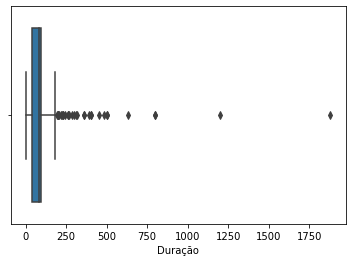

In [23]:
ax = sns.boxplot(x=base_dados["Duração"])

In [24]:
base_dados.select_dtypes(include=['int64', 'float64', 'int32']).describe(percentiles = [.25, .50, .75, .95, .99, .999]).round(2)

,Ano,Duração
count,2949.00,2949.00
mean,2002.03,75.03
std,20.75,62.07
min,1908.00,1.00
25%,1987.00,36.00
50%,2011.00,84.00
75%,2018.00,97.00
95%,2021.00,118.00
99%,2022.00,195.20
99.9%,2022.00,800.00


In [25]:
# Eliminar outliers: valores abaixo de 10 e acima de 200 min (séries)
base_dados = base_dados.drop(base_dados[base_dados.Duração > 200].index)
base_dados = base_dados.drop(base_dados[base_dados.Duração < 10].index)

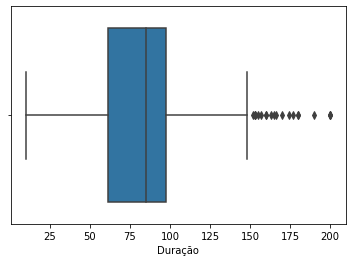

In [26]:
# Boxplot: Duração dos filmes
ax = sns.boxplot(x=base_dados["Duração"])

**Feature: Ano**

In [27]:
# Transformar o Ano em variável categórica
base_dados['Ano'] = base_dados['Ano'].astype('category')

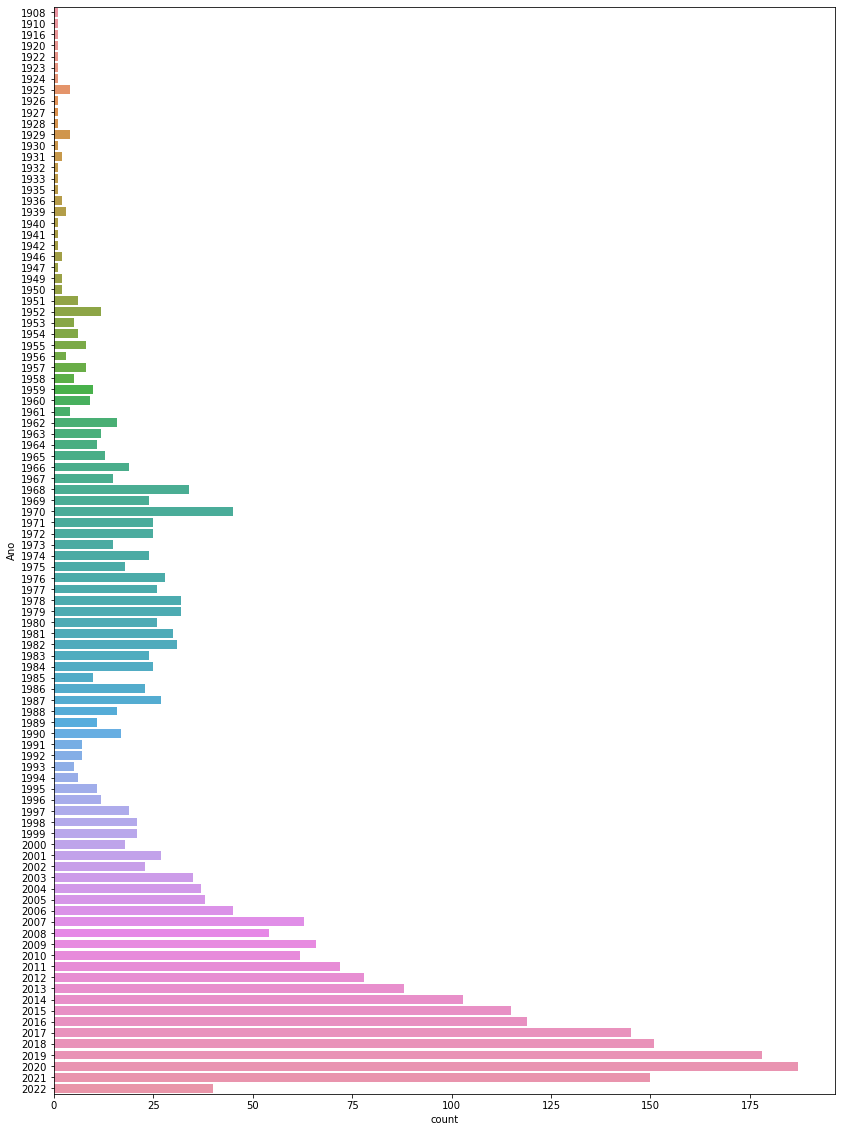

In [28]:
# Histograma: Ano
ax = sns.countplot(y="Ano", data=base_dados)
ax.figure.set_size_inches(14, 20)
plt.show()

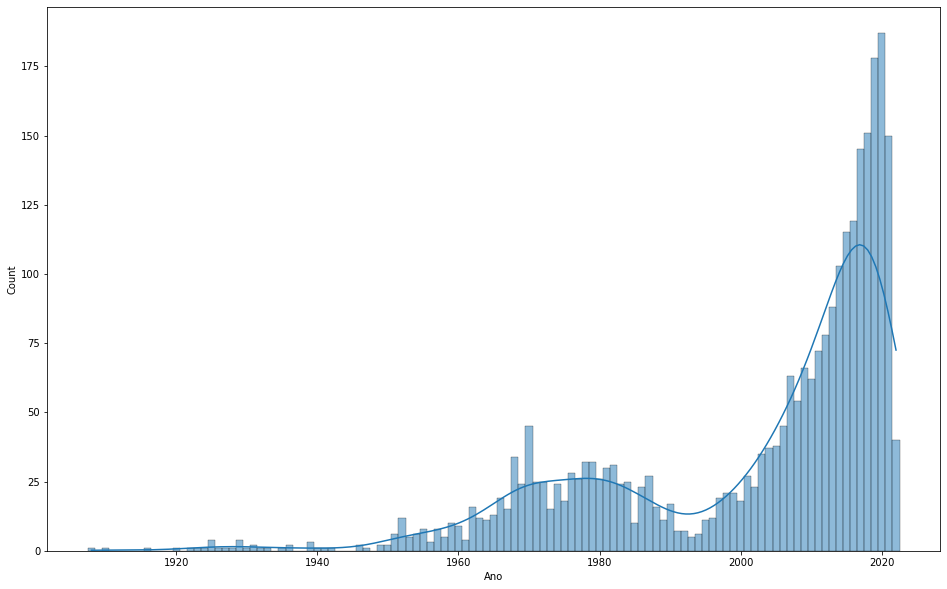

In [29]:
ax = sns.histplot(data=base_dados, x="Ano", kde=True)
ax.figure.set_size_inches(16, 10)

**Feature: Diretor**

In [30]:
diretores = base_dados['Diretor'].groupby(base_dados['Diretor']).count().sort_values(ascending=False)
diretores

Diretor
Júlio Bressane               28
José Mojica Marins           27
Eduardo Coutinho             21
Nelson Pereira dos Santos    20
Carlos Reichenbach           19
                             ..
Haroldo Borges                1
Haroldo Marinho Barbosa       1
Helder Quiroga                1
Helena Frade                  1
José Walter Lima              1
Name: Diretor, Length: 1280, dtype: int64

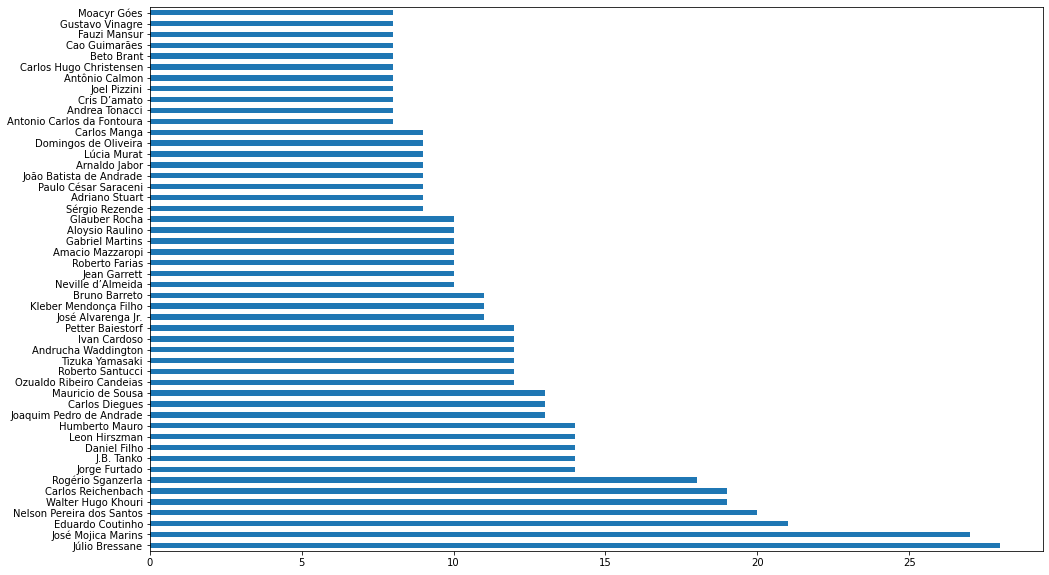

In [31]:
# 0s 50 cineatas com mais filmes
ax = base_dados['Diretor'].value_counts()[:50].plot(kind='barh')
ax.figure.set_size_inches(16, 10)

**Feature: Rating**

In [32]:
rating = base_dados['Rating'].groupby(base_dados['Rating']).count().sort_values(ascending=True)
rating

Rating
4.7      1
4.6      1
0.9      1
1.5      2
1.6      2
1.7      4
4.5      4
4.3      4
4.4      4
1.1      5
1.8      5
1.9      8
2.0      8
2.1     11
4.2     15
2.2     19
2.3     19
2.4     27
2.5     32
4.1     32
2.8     54
2.6     55
2.7     60
4.0     74
3.9     82
2.9     89
3.0    122
3.8    131
3.1    160
3.7    175
3.2    188
3.6    215
3.3    256
3.4    281
3.5    299
       327
Name: Rating, dtype: int64

In [33]:
# Eliminar os que possuem rating nulo por entender que é muito importante para análise
indexNames = base_dados[base_dados['Rating']==' '].index
base_dados.drop(indexNames,inplace=True)

In [34]:
base_dados['Rating'].groupby(base_dados['Rating']).count().sort_values(ascending=True)

Rating
0.9      1
4.6      1
4.7      1
1.6      2
1.5      2
4.5      4
4.4      4
4.3      4
1.7      4
1.1      5
1.8      5
1.9      8
2.0      8
2.1     11
4.2     15
2.2     19
2.3     19
2.4     27
4.1     32
2.5     32
2.8     54
2.6     55
2.7     60
4.0     74
3.9     82
2.9     89
3.0    122
3.8    131
3.1    160
3.7    175
3.2    188
3.6    215
3.3    256
3.4    281
3.5    299
Name: Rating, dtype: int64

In [35]:
base_dados['Rating'] = base_dados['Rating'].astype('float')

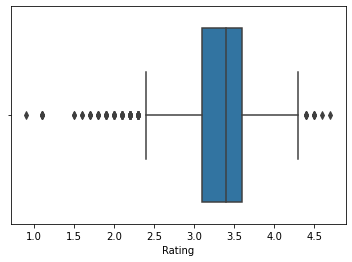

In [36]:
ax = sns.boxplot(x=base_dados["Rating"])

In [37]:
base_dados.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68k,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52k,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71k,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45k,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--


**Feature: Watchedby**

In [38]:
base_dados['Watchedby'].groupby(base_dados['Watchedby']).count().sort_values(ascending=False)

Watchedby
1.2k    30
1.5k    27
1.3k    27
1.1k    25
1.7k    22
        ..
511      1
509      1
503      1
500      1
40k      1
Name: Watchedby, Length: 687, dtype: int64

In [46]:
if base_dados['Watchedby'].str.contains('[.]') is True:
    for i in range(1,10):
        for j in range(1,10):
            base_dados['Watchedby'] = base_dados['Watchedby'].str.replace(f'{i}.{j}k', f'{i}{j}00')

In [49]:
base_dados.head(20)

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68k,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52k,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71k,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45k,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--
5,2007,Brazil,Elite Squad,‘Tropa de Elite’,José Padilha,55k,7.5k,11k,,298,3.9,115,"In 1997, before the visit of the pope to Rio d...","['action', 'drama', 'crime']",action,drama,crime
6,2019,Brazil,The Edge of Democracy,‘Democracia em Vertigem’,Petra Costa,33k,6.8k,6.7k,,24,3.8,121,A cautionary tale for these times of democracy...,['documentary'],documentary,--,--
7,1980,Brazil,Pixote,‘Pixote: A Lei do Mais Fraco’,Héctor Babenco,16k,9.4k,4.7k,,193,4.1,128,"10-year-old Pixote endures torture, degradatio...","['crime', 'drama']",crime,drama,--
8,1984,Brazil,Twenty Years Later,‘Cabra Marcado Para Morrer’,Eduardo Coutinho,9.9k,6k,4k,,302,4.6,119,Eduardo Coutinho was filming a movie with the ...,['documentary'],documentary,--,--
9,1964,Brazil,"Black God, White Devil",‘Deus e o Diabo na Terra do Sol’,Glauber Rocha,15k,9.7k,4.2k,,274,4.1,120,Cowherd Manoel and his wife are on the run in ...,"['adventure', 'western', 'drama']",adventure,western,drama


In [192]:
for i in range(1,10):
    for j in range(1,10):
        base_dados['Watchedby'] = base_dados['Watchedby'].str.replace(f'{i}.{j}k', f'{i}{j}00')
base_dados['Watchedby'].replace(to_replace='k', value='000', regex=True,inplace=True)

C:\Users\natha\AppData\Local\Temp\ipykernel_72352\4092980629.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  base_dados['Watchedby'] = base_dados['Watchedby'].str.replace(f'{i}.{j}k', f'{i}{j}00')


In [193]:
base_dados['Watchedby'].groupby(base_dados['Watchedby']).count().sort_values(ascending=False)

Watchedby
1200    30
1300    27
1500    27
1100    25
1700    22
        ..
511      1
509      1
503      1
500      1
9900     1
Name: Watchedby, Length: 686, dtype: int64

In [194]:
base_dados['Watchedby'] = base_dados['Watchedby'].astype('int')

In [195]:
base_dados.iloc[0,5] = 379000

In [196]:
base_dados.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379000,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68000,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52000,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71000,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45000,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--


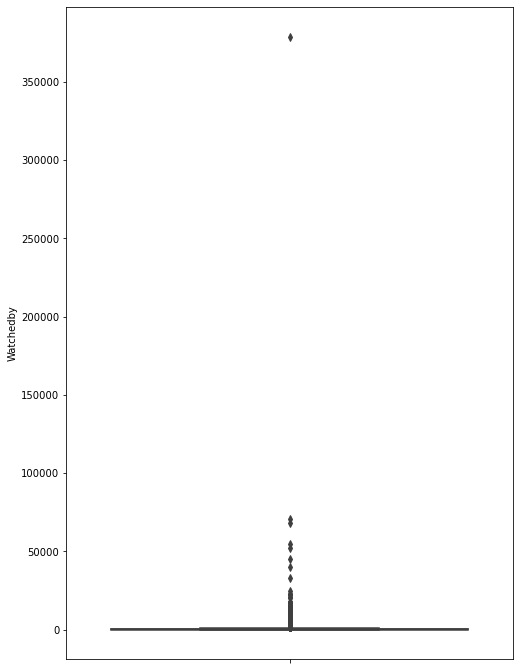

In [197]:
ax = sns.boxplot(y=base_dados["Watchedby"])
ax.figure.set_size_inches(8, 12)

In [198]:
base_dados.select_dtypes(include=['int64', 'float64', 'int32']).describe(percentiles = [.25, .50, .75, .95]).round(2)

,Watchedby,Rating,Duração
count,2445.00,2445.00,2445.00
mean,1208.15,3.32,75.09
std,8431.55,0.45,34.17
min,37.00,0.90,10.00
25%,107.00,3.10,60.00
50%,216.00,3.40,85.00
75%,627.00,3.60,98.00
95%,4300.00,4.00,116.00
max,379000.00,4.70,200.00


In [199]:
# Limpar outliers para teste:
sem_outliers = base_dados.copy()
sem_outliers = sem_outliers.drop(sem_outliers[sem_outliers.Watchedby > 4300].index)

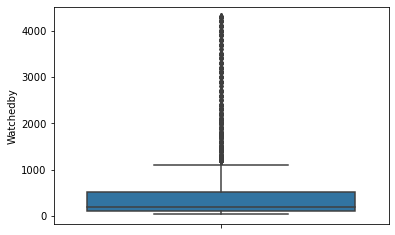

In [200]:
ax = sns.boxplot(y=sem_outliers["Watchedby"])

**Feature: Liked**

In [201]:
base_dados['Liked'].groupby(base_dados['Liked']).count().sort_values(ascending=False)

Liked
10      64
6       59
7       58
11      57
9       56
        ..
424      1
213      1
436      1
437      1
3.9k     1
Name: Liked, Length: 423, dtype: int64

In [202]:
for i in range(1,10):
    for j in range(1,10):
        base_dados['Liked'] = base_dados['Liked'].str.replace(f'{i}.{j}k', f'{i}{j}00')

C:\Users\natha\AppData\Local\Temp\ipykernel_72352\395460775.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  base_dados['Liked'] = base_dados['Liked'].str.replace(f'{i}.{j}k', f'{i}{j}00')


In [203]:
base_dados['Liked'].groupby(base_dados['Liked']).count().sort_values(ascending=False)

Liked
10     64
6      59
7      58
11     57
9      56
       ..
436     1
437     1
438     1
225     1
309     1
Name: Liked, Length: 422, dtype: int64

In [204]:
base_dados['Liked'].replace(to_replace='k', value='000', regex=True,inplace=True)

In [205]:
base_dados['Liked'] = base_dados['Liked'].astype('int')

In [206]:
base_dados.head(2)

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379000,77k,1300,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68000,11k,29000,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy


In [207]:
base_dados.iloc[0,7] = 133000

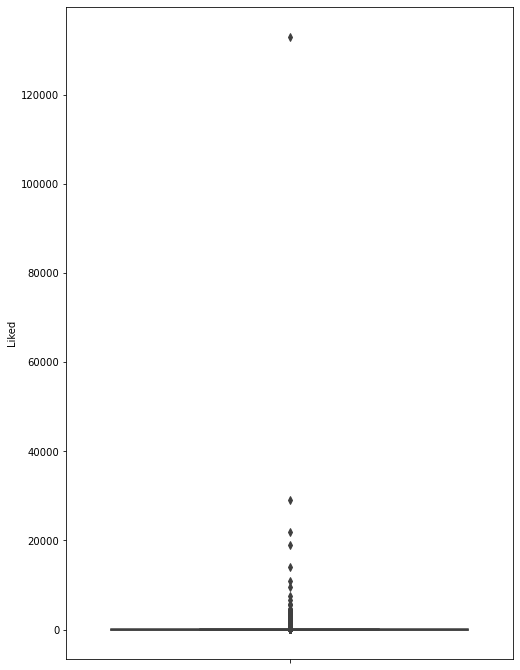

In [208]:
ax = sns.boxplot(y=base_dados["Liked"])
ax.figure.set_size_inches(8, 12)

In [209]:
base_dados.select_dtypes(include=['int64', 'float64', 'int32']).describe(percentiles = [.25, .50, .75, .95]).round(2)

,Watchedby,Liked,Rating,Duração
count,2445.00,2445.00,2445.00,2445.00
mean,1208.15,252.49,3.32,75.09
std,8431.55,2879.29,0.45,34.17
min,37.00,0.00,0.90,10.00
25%,107.00,14.00,3.10,60.00
50%,216.00,32.00,3.40,85.00
75%,627.00,96.00,3.60,98.00
95%,4300.00,596.00,4.00,116.00
max,379000.00,133000.00,4.70,200.00


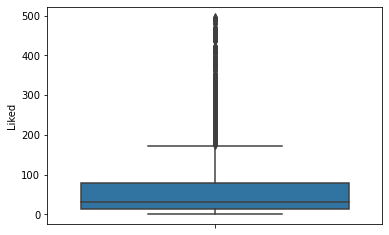

In [210]:
# Limpar outliers para teste:
sem_outliers = base_dados.copy()
sem_outliers = sem_outliers.drop(sem_outliers[sem_outliers.Liked > 500].index)
ax = sns.boxplot(y=sem_outliers["Liked"])

Taxa da relação entre o número de curtidas e de assistidos

In [211]:
base_dados['Taxa_Liked_Watched'] = (base_dados['Liked'] /base_dados['Watchedby']).round(2) 

In [212]:
base_dados.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3,Taxa_Liked_Watched
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379000,77k,133000,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--,0.35
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68000,11k,29000,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy,0.43
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52000,15k,19000,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--,0.37
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71000,16k,22000,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--,0.31
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45000,12k,14000,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--,0.31


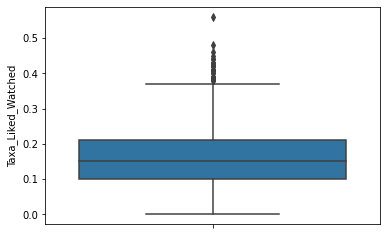

In [213]:
ax = sns.boxplot(y=base_dados["Taxa_Liked_Watched"])

In [214]:
base_dados.loc[base_dados['Taxa_Liked_Watched']>0.4]

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3,Taxa_Liked_Watched
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68000,11k,29000,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy,0.43
14,1999,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,20000,1.4k,9500,,242,4.7,174,The (mis)adventures of João Grilo and Chicó in...,"['comedy', 'drama']",comedy,drama,--,0.48
21,2007,Brazil,Playing,‘Jogo de Cena’,Eduardo Coutinho,8500,3.7k,3500,,209,4.5,100,"Following a newspaper ad, ordinary women tell ...",['documentary'],documentary,--,--,0.41
31,2020,Brazil,Emicida: AmarElo - It’s All for Yesterday,‘Emicida: AmarElo - É Tudo Pra Ontem’,Fred Ouro Preto,11000,1.8k,4600,,34,4.5,89,Between scenes from his concert in São Paulo’s...,"['documentary', 'music']",documentary,music,--,0.42
42,2021,Brazil,Monica and Friends: Lessons,‘Turma da Mônica: Lições’,Daniel Rezende,7900,1.5k,3200,,28,4.1,97,"In the sequel to Turma da Mônica: Laços, we fo...","['drama', 'family', 'comedy']",drama,family,comedy,0.41
168,1979,Brazil,The Woman Who Invented Love,‘A Mulher Que Inventou o Amor’,Jean Garrett,777,690,328,,16,4.1,100,Doralice is a simple minded woman romantically...,['drama'],drama,--,--,0.42
329,1973,Brazil,Compasso de Espera,Compasso de Espera,Antunes Filho,571,362,248,,9,4.2,94,Jorge de Oliveira is an Afro-Brazilian poet wh...,"['drama', 'romance']",drama,romance,--,0.43
542,1998,Brazil,Vassourinha: The Voice and The Void,‘A Voz e o Vazio: A Vez de Vassourinha’,Carlos Adriano,579,219,236,,5,4.1,17,Experimental documentary about the life and wo...,"['music', 'documentary']",music,documentary,--,0.41
634,1984,Brazil,Extremes of Pleasure,‘Extremos do Prazer’,Carlos Reichenbach,262,162,116,,7,4.0,94,"Luiz Antônio, a sociologist, had his political...",['drama'],drama,--,--,0.44
674,1989,Brazil,Ôrí,Ôrí,Raquel Gerber,333,169,140,,6,4.2,100,A look at the Brazilian black movement between...,['documentary'],documentary,--,--,0.42


**Fans, listas e Ranking não serão contabilizados para análises**

In [215]:
def feature(atributo):
    for i in range(1,10):
        for j in range(1,10):
            base_dados[atributo] = base_dados[atributo].str.replace(f'{i}.{j}k', f'{i}{j}00')
    base_dados[atributo].replace(to_replace='k', value='000', regex=True,inplace=True)
    base_dados[atributo] = base_dados[atributo].astype('int', errors='ignore')

In [216]:
feature('Ranking')
feature('Listado (qtd)')
feature('Fans')

C:\Users\natha\AppData\Local\Temp\ipykernel_72352\2346106673.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  base_dados[atributo] = base_dados[atributo].str.replace(f'{i}.{j}k', f'{i}{j}00')


In [217]:
base_dados.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3,Taxa_Liked_Watched
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379000,77000,133000,24,10000,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--,0.35
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68000,11000,29000,5,1400,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy,0.43
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52000,15000,19000,22,1800,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--,0.37
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71000,16000,22000,,1100,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--,0.31
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45000,12000,14000,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--,0.31


In [218]:
# Dataset após exclusão de colunas e linhas e anterior as transformações para dados numéricos
df_limpo.head()

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
0,2002,Brazil,City of God,‘Cidade de Deus’,Fernando Meirelles,379k,77k,133k,24,10k,4.4,130,Buscapé was raised in a very violent environme...,"['crime', 'drama']",crime,drama,--
1,2000,Brazil,A Dog’s Will,‘O Auto da Compadecida’,Guel Arraes,68k,11k,29k,5,1.4k,4.5,104,The lively João Grilo and the sly Chicó are po...,"['drama', 'fantasy', 'comedy']",drama,fantasy,comedy
2,1998,Brazil,Central Station,‘Central do Brasil’,Walter Salles,52k,15k,19k,22,1.8k,4.4,110,"An emotive journey of a former school teacher,...",['drama'],drama,--,--
3,2014,Brazil,The Way He Looks,‘Hoje Eu Quero Voltar Sozinho’,Daniel Ribeiro,71k,16k,22k,,1.1k,4.0,96,Leonardo is a blind teenager dealing with an o...,"['romance', 'drama']",romance,drama,--
4,2015,Brazil,The Second Mother,‘Que Horas Ela Volta?’,Anna Muylaert,45k,12k,14k,112,429,4.2,112,After leaving her daughter Jessica in a small ...,['drama'],drama,--,--


#### Análise conjunta dos atributos

In [219]:
# Medidas de tendência central, de variabilidade
base_dados.select_dtypes(include=['int64', 'float64', 'int32']).describe(percentiles = [.25, .50, .75, .95, .99, .999]).round(2)

,Watchedby,Listado (qtd),Liked,Fans,Rating,Duração,Taxa_Liked_Watched
count,2445.00,2445.00,2445.00,2445.00,2445.00,2445.00,2445.00
mean,1208.15,300.92,252.49,9.70,3.32,75.09,0.16
std,8431.55,1765.48,2879.29,209.57,0.45,34.17,0.08
min,37.00,8.00,0.00,0.00,0.90,10.00,0.00
25%,107.00,45.00,14.00,0.00,3.10,60.00,0.10
50%,216.00,83.00,32.00,0.00,3.40,85.00,0.15
75%,627.00,197.00,96.00,1.00,3.60,98.00,0.21
95%,4300.00,941.00,596.00,13.00,4.00,116.00,0.31
99%,13560.00,3412.00,3156.00,104.56,4.20,138.68,0.38
99.9%,62228.00,13668.00,20668.00,1266.80,4.50,185.56,0.46


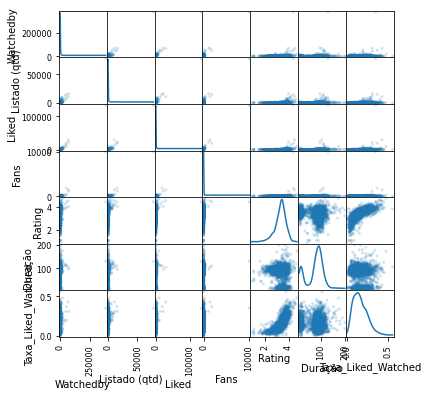

In [220]:
# Pandas plotting
scatter_matrix(base_dados, alpha=0.2, figsize=(6, 6), diagonal="kde");

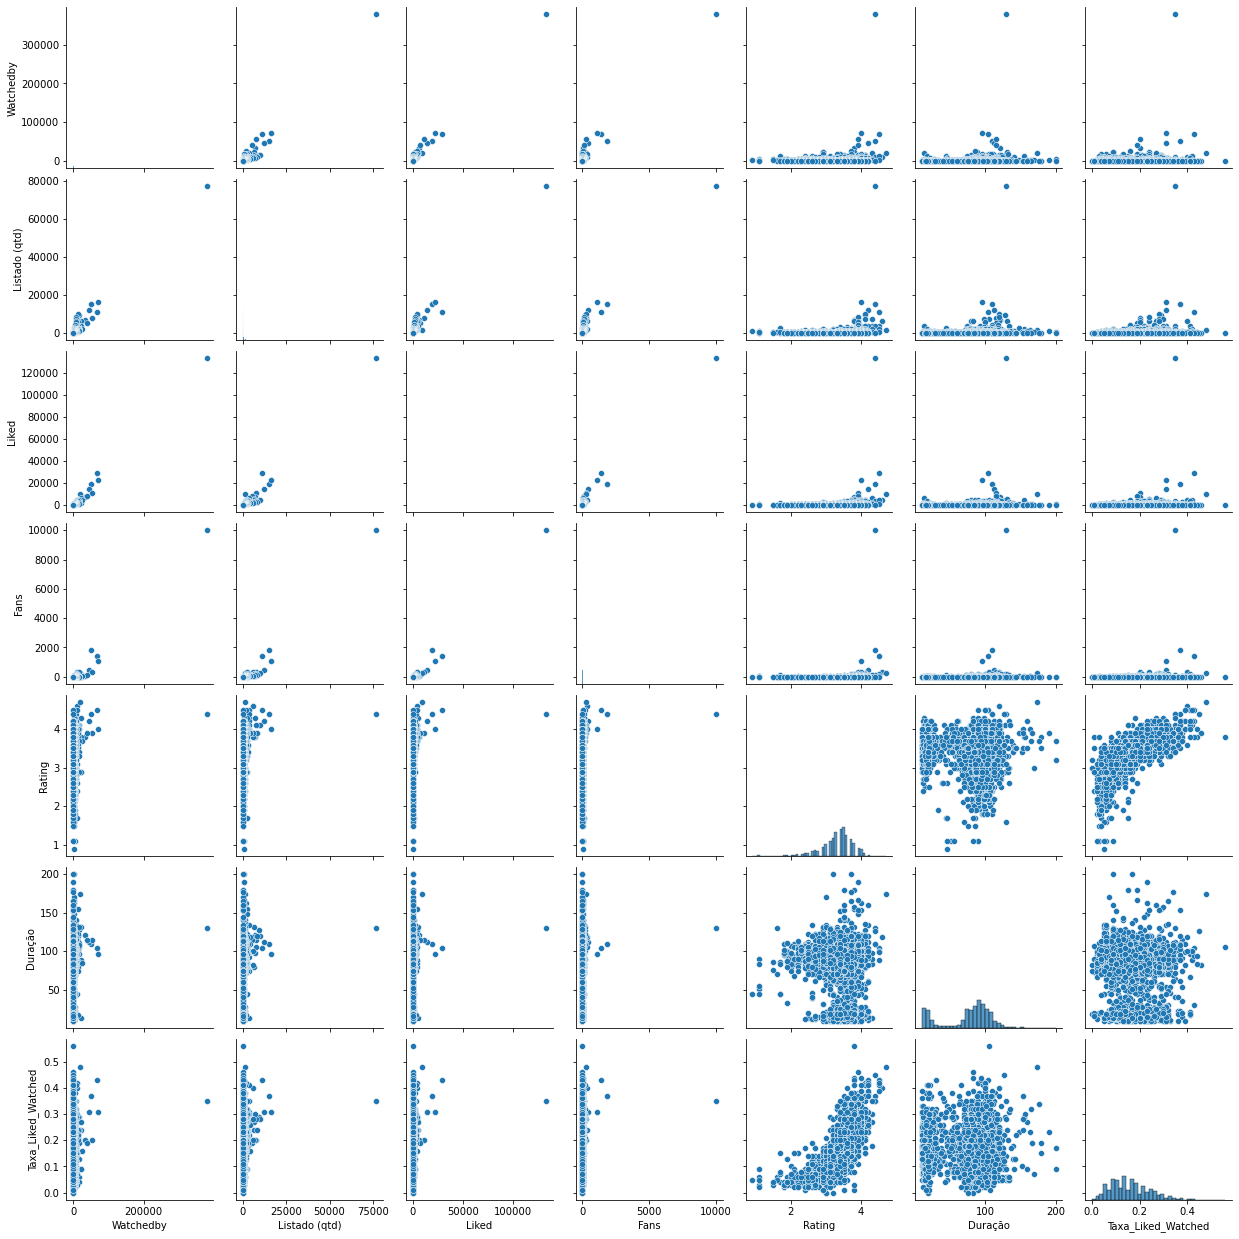

In [221]:
# Pairplot - seaborn
sns.pairplot(data = base_dados)

In [222]:
# Spearman = Técnica Não Paramétrica. Não requer que as variáveis sigam uma distribuição específica para ser aplicado
# Serve para medir a correlação não linear entre duas variáveis
correlacao = base_dados.corr(method = 'spearman')
correlacao 

,Watchedby,Listado (qtd),Liked,Fans,Rating,Duração,Taxa_Liked_Watched
Watchedby,1.000000,0.824859,0.900541,0.583624,0.052845,0.282854,0.036976
Listado (qtd),0.824859,1.000000,0.817588,0.601343,0.126930,0.376511,0.176210
Liked,0.900541,0.817588,1.000000,0.648802,0.352655,0.206458,0.421859
Fans,0.583624,0.601343,0.648802,1.000000,0.288408,0.257991,0.298145
Rating,0.052845,0.126930,0.352655,0.288408,1.000000,-0.144436,0.796542
Duração,0.282854,0.376511,0.206458,0.257991,-0.144436,1.000000,-0.118825
Taxa_Liked_Watched,0.036976,0.176210,0.421859,0.298145,0.796542,-0.118825,1.000000


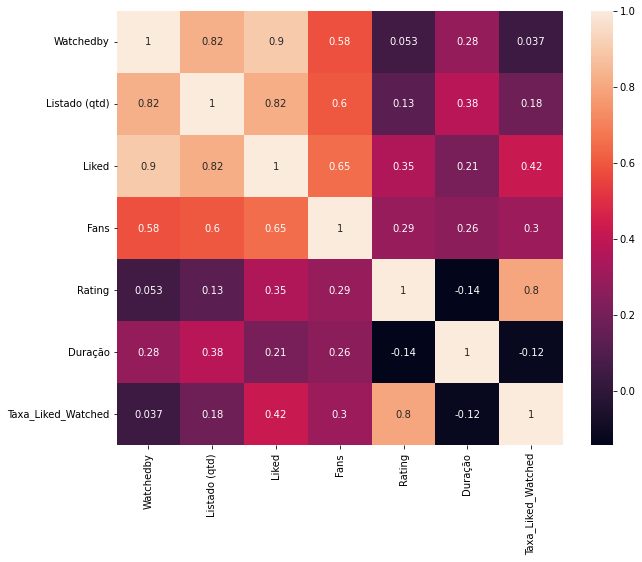

In [223]:
# Um filme que aparece em muitas listas não tem relação com o rating
ax = sns.heatmap(correlacao, annot=True)
ax.figure.set_size_inches(10, 8)

<AxesSubplot:xlabel='Gênero 3', ylabel='count'>

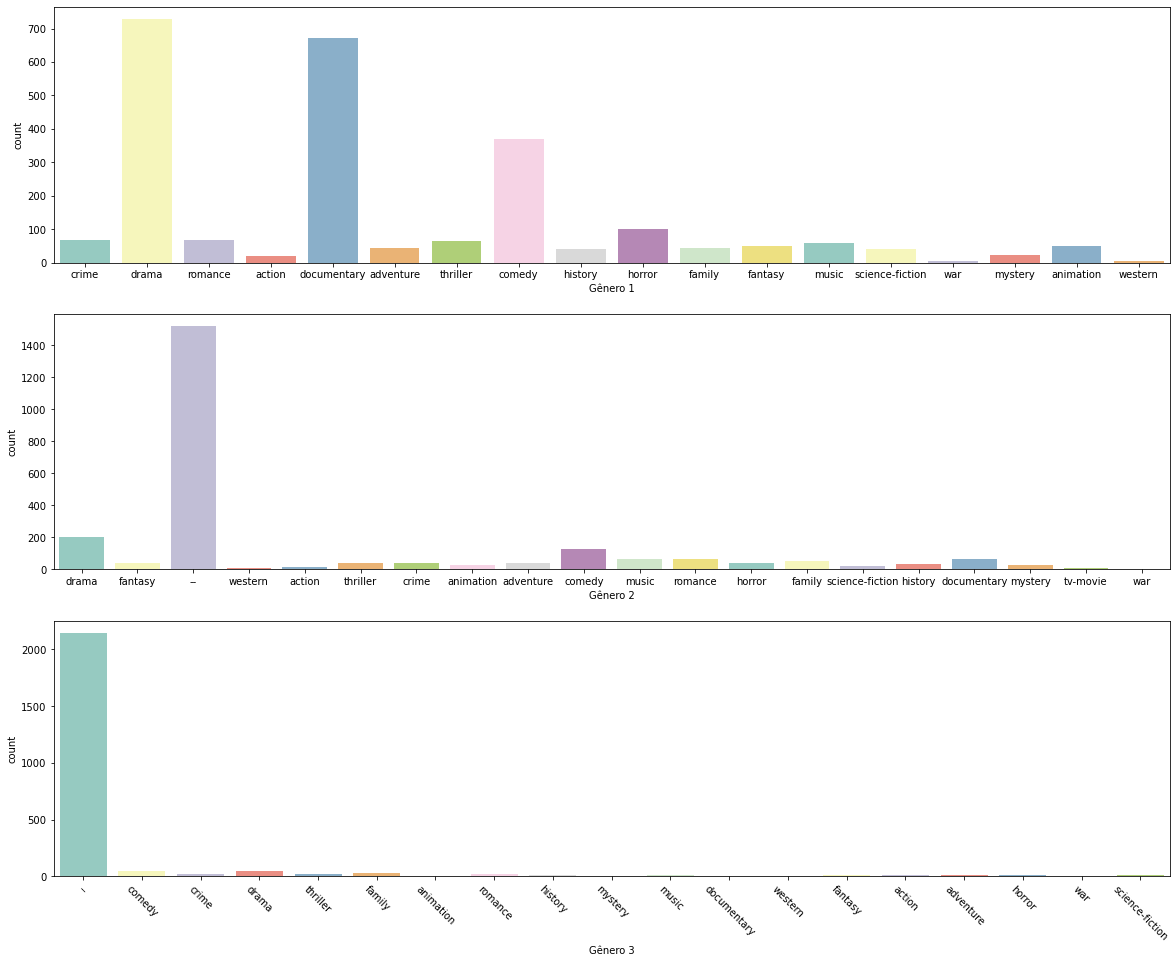

In [224]:
# Gêneros: 1, 2 e 3
fig, axes = plt.subplots(3, 1, figsize=(20, 16))
plt.xticks(rotation=-45)
sns.countplot(ax=axes[0], x="Gênero 1", data=base_dados, palette="Set3")

sns.countplot(ax=axes[1], x="Gênero 2", data=base_dados, palette="Set3")

sns.countplot(ax=axes[2], x="Gênero 3", data=base_dados, palette="Set3")

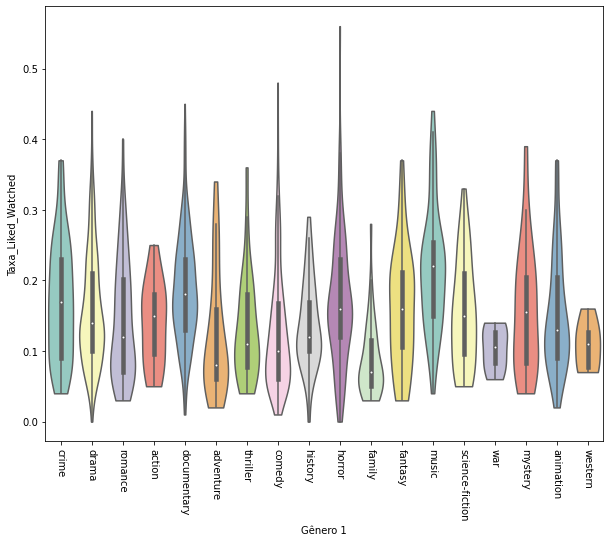

In [225]:
ax = sns.violinplot(y="Taxa_Liked_Watched", x="Gênero 1",
                    data=base_dados,
                    cut=0, scale="width", palette="Set3")
ax.figure.set_size_inches(10, 8)
plt.xticks(rotation=-90)
plt.show()

In [226]:
taxa = base_dados.loc[base_dados['Gênero 1']=='history']
taxa['Taxa_Liked_Watched'].min(), taxa['Taxa_Liked_Watched'].max()

(0.0, 0.29)

In [227]:
base_dados.loc[base_dados['Gênero 1']=='history']

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3,Taxa_Liked_Watched
20,2019,Brazil,Marighella,Marighella,Wagner Moura,13000,2200,3800,,40,3.8,155,"Afro-Brazilian poet and politician, the legend...","['history', 'drama', 'thriller']",history,drama,thriller,0.29
64,2005,Brazil,Two Sons of Francisco,‘Dois Filhos de Francisco’,Breno Silveira,17000,1000,1100,,7,3.3,132,"The story of Francisco, a very simple and poor...","['history', 'music', 'drama']",history,music,drama,0.06
82,2014,Brazil,Tim Maia,Tim Maia,Mauro Lima,8300,942,1500,,9,3.6,140,"Biopic of Brazilian singer Tim Maia, from his ...","['history', 'drama', 'music']",history,drama,music,0.18
117,1971,Brazil,How Tasty Was My Little Frenchman,‘Como Era Gostoso o Meu Francês’,Nelson Pereira dos Santos,2200,1800,413,,7,3.5,84,"Brazil, 1594. The Tupinambás natives are frien...","['history', 'adventure', 'comedy']",history,adventure,comedy,0.19
205,2016,Brazil,Cinema Novo,Cinema Novo,Eryk Rocha,2000,538,349,,1,3.6,93,"A deep investigation, in the way of a poetic e...","['history', 'documentary']",history,documentary,--,0.17
234,2006,Brazil,Zuzu Angel,Zuzu Angel,Sérgio Rezende,3100,421,265,,3,3.5,108,Covering the last years of the famous Brazilia...,"['history', 'drama']",history,drama,--,0.09
249,2014,Brazil,Getulio,‘Getúlio’,João Jardim,2900,397,208,,0,3.0,100,The movie depicts the political crisis that le...,"['history', 'drama']",history,drama,--,0.07
250,1967,Brazil,The Case of the Naves Brothers,‘O Caso dos Irmãos Naves’,Luiz Sérgio Person,1200,662,289,,4,4.0,92,"After their relative and associate runs way, t...","['history', 'drama']",history,drama,--,0.24
283,2012,Brazil,Gonzaga: From Father to Son,‘Gonzaga: De Pai pra Filho’,Breno Silveira,3300,396,371,,2,3.5,120,Luiz Gonzaga decides to change his destiny and...,"['history', 'drama', 'music']",history,drama,music,0.11
319,1995,Brazil,"Carlota Joaquina, Princess of Brazil","‘Carlota Joaquina, Princesa do Brazil’",Carla Camurati,2400,524,205,,0,3.2,100,"The life of Carlota Joaquina, the Spanish infa...","['history', 'comedy']",history,comedy,--,0.09


C:\Users\natha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\natha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1215: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


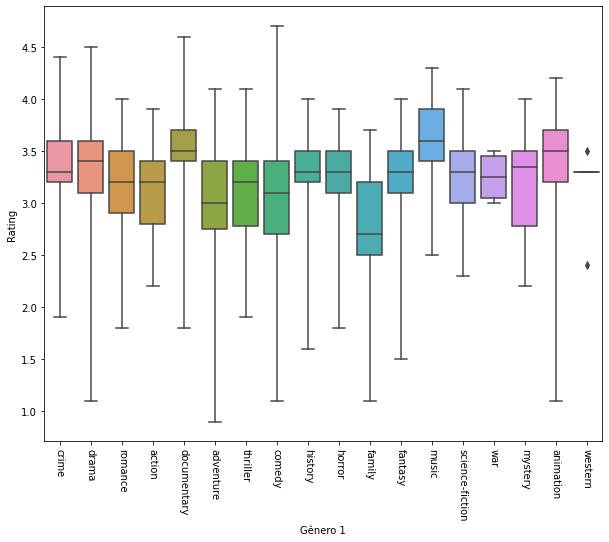

In [228]:
ax = sns.boxplot(y="Rating", x="Gênero 1", data=base_dados, whis=np.inf)
ax.figure.set_size_inches(10, 8)
plt.xticks(rotation=-90)
plt.show()

In [229]:
taxa = base_dados.loc[base_dados['Gênero 1']=='comedy']
taxa['Rating'].min(), taxa['Rating'].max()

(1.1, 4.7)

In [230]:
taxa = base_dados.loc[base_dados['Gênero 1']=='adventure']
taxa['Rating'].min(), taxa['Rating'].max()

(0.9, 4.1)

In [151]:
# Gerar o csv:
base_dados.to_csv('eda_filmes.csv', index=False)

In [264]:
base_dados.loc[base_dados['Título Original']=='Bio']

,Ano,País 1,Título US,Título Original,Diretor,Watchedby,Listado (qtd),Liked,Ranking,Fans,Rating,Duração,Sinopse,Gênero,Gênero 1,Gênero 2,Gênero 3
2180,2018,Brazil,Bio,Bio,Carlos Gerbase,125,48,7,,1,3.0,105,The film tells the story of a man who was born...,['science-fiction'],science-fiction,--,--
